Attaching used packages

In [3]:
library(reshape)
library(ggplot2)
library(mice)
library(caTools)
library(rpart)
library(rpart.plot)
library(caret)
library(e1071)
library(randomForest)

Read data files

In [4]:
# Read data
Train_ALL = read.csv("Train2016.csv", na.strings=c("", "NA"))
Test_ALL = read.csv("Test2016.csv", na.strings=c("", "NA"))

In [5]:
# Correct YOB (incorrect years)
Train_ALL$YOB[Train_ALL$YOB < 1930 | Train_ALL$YOB > 2004] = NA

Select specific questions (relevant to voting outcomes)

In [6]:
Train = Train_ALL[,c("USER_ID", "YOB", "Gender", "Income", "HouseholdStatus", "EducationLevel", "Party", "Q98059", "Q98197", "Q99480", "Q106272", "Q107869", "Q108343", "Q108617", "Q108754", "Q109244", "Q109367", "Q112270", "Q113181", "Q114386", "Q115195", "Q115602", "Q115611", "Q116441", "Q116881", "Q116953", "Q120650", "Q122771", "Q123621", "Q124122")]

Multiple Imputation for demographics and questions

In [7]:
# Multiple Imputation for demographics
set.seed(128)

simple = Train[,c(2:6,8:30)]
Train_imputed = complete(mice(simple))

Train$YOB = Train_imputed$YOB
Train$Gender = Train_imputed$Gender
Train$Income = Train_imputed$Income
Train$HouseholdStatus = Train_imputed$HouseholdStatus
Train$EducationLevel = Train_imputed$EducationLevel

Train$Q98059 = Train_imputed$Q98059
Train$Q98197 = Train_imputed$Q98197
Train$Q99480 = Train_imputed$Q99480
Train$Q106272 = Train_imputed$Q106272
Train$Q107869 = Train_imputed$Q107869
Train$Q108343 = Train_imputed$Q108343
Train$Q108617 = Train_imputed$Q108617
Train$Q108754 = Train_imputed$Q108754
Train$Q109244 = Train_imputed$Q109244
Train$Q109367 = Train_imputed$Q109367
Train$Q112270 = Train_imputed$Q112270
Train$Q113181 = Train_imputed$Q113181
Train$Q114386 = Train_imputed$Q114386
Train$Q115195 = Train_imputed$Q115195
Train$Q115602 = Train_imputed$Q115602
Train$Q115611 = Train_imputed$Q115611
Train$Q116441 = Train_imputed$Q116441
Train$Q116881 = Train_imputed$Q116881
Train$Q116953 = Train_imputed$Q116953
Train$Q120650 = Train_imputed$Q120650
Train$Q122771 = Train_imputed$Q122771
Train$Q123621 = Train_imputed$Q123621
Train$Q124122 = Train_imputed$Q124122


 iter imp variable
  1   1  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q115195  Q115602  Q115611  Q116441  Q116881  Q116953  Q120650  Q122771  Q123621  Q124122
  1   2  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q115195  Q115602  Q115611  Q116441  Q116881  Q116953  Q120650  Q122771  Q123621  Q124122
  1   3  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q115195  Q115602  Q115611  Q116441  Q116881  Q116953  Q120650  Q122771  Q123621  Q124122
  1   4  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q1151

Age & AgeRange calculation

In [8]:
Train$Age = 2016 - Train$YOB
Train$AgeRange = cut(Train$Age, 
                     breaks = c(-Inf, 20, 30, 40, 50, 60, Inf), 
                     labels = c("-20", "20-29", "30-39", "40-49", "50-59", "60+"),
                     right = FALSE)
Train$YOB = NULL
Train$Age = NULL

Make the same changes on test data

In [9]:
# Correct YOB (incorrect years)
Test_ALL$YOB[Test_ALL$YOB < 1930 | Test_ALL$YOB > 2004] = NA

Test = Test_ALL[,c("USER_ID", "YOB", "Gender", "Income", "HouseholdStatus", "EducationLevel", "Q98059", "Q98197", "Q99480", "Q106272", "Q107869", "Q108343", "Q108617", "Q108754", "Q109244", "Q109367", "Q112270", "Q113181", "Q114386", "Q115195", "Q115602", "Q115611", "Q116441", "Q116881", "Q116953", "Q120650", "Q122771", "Q123621", "Q124122")]

simpleTest = Test[,2:29]
Test_imputed = complete(mice(simpleTest))

Test$YOB = Test_imputed$YOB
Test$Gender = Test_imputed$Gender
Test$Income = Test_imputed$Income
Test$HouseholdStatus = Test_imputed$HouseholdStatus
Test$EducationLevel = Test_imputed$EducationLevel

Test$Q98059 = Test_imputed$Q98059
Test$Q98197 = Test_imputed$Q98197
Test$Q99480 = Test_imputed$Q99480
Test$Q106272 = Test_imputed$Q106272
Test$Q107869 = Test_imputed$Q107869
Test$Q108343 = Test_imputed$Q108343
Test$Q108617 = Test_imputed$Q108617
Test$Q108754 = Test_imputed$Q108754
Test$Q109244 = Test_imputed$Q109244
Test$Q109367 = Test_imputed$Q109367
Test$Q112270 = Test_imputed$Q112270
Test$Q113181 = Test_imputed$Q113181
Test$Q114386 = Test_imputed$Q114386
Test$Q115195 = Test_imputed$Q115195
Test$Q115602 = Test_imputed$Q115602
Test$Q115611 = Test_imputed$Q115611
Test$Q116441 = Test_imputed$Q116441
Test$Q116881 = Test_imputed$Q116881
Test$Q116953 = Test_imputed$Q116953
Test$Q120650 = Test_imputed$Q120650
Test$Q122771 = Test_imputed$Q122771
Test$Q123621 = Test_imputed$Q123621
Test$Q124122 = Test_imputed$Q124122

# Age & AgeRange calculation
Test$Age = 2016 - Test$YOB
Test$AgeRange = cut(Test$Age, 
                     breaks = c(-Inf, 20, 30, 40, 50, 60, Inf), 
                     labels = c("-20", "20-29", "30-39", "40-49", "50-59", "60+"),
                     right = FALSE)
Test$YOB = NULL
Test$Age = NULL


 iter imp variable
  1   1  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q115195  Q115602  Q115611  Q116441  Q116881  Q116953  Q120650  Q122771  Q123621  Q124122
  1   2  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q115195  Q115602  Q115611  Q116441  Q116881  Q116953  Q120650  Q122771  Q123621  Q124122
  1   3  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q115195  Q115602  Q115611  Q116441  Q116881  Q116953  Q120650  Q122771  Q123621  Q124122
  1   4  YOB  Gender  Income  HouseholdStatus  EducationLevel  Q98059  Q98197  Q99480  Q106272  Q107869  Q108343  Q108617  Q108754  Q109244  Q109367  Q112270  Q113181  Q114386  Q1151

Create melted data sets for visualization of training set (relation to dependent variable)

In [11]:
melted01 = melt(Train[,c(2:6, 30)], id = "Party")
melted02 = melt(Train[,c(6, 7:18)], id = "Party")
melted03 = melt(Train[,c(6, 19:29)], id = "Party")

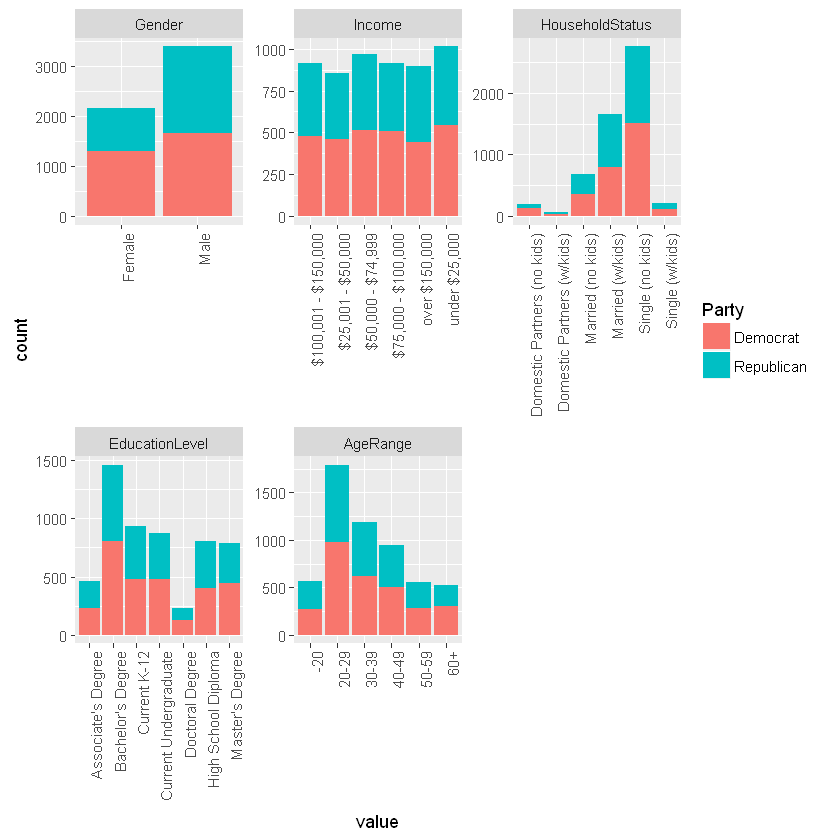

In [12]:
# Counts
ggplot(melted01, aes(x = value, y = ..count.., fill = Party)) + 
    geom_bar() +
    facet_wrap(~ variable, scales = "free") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

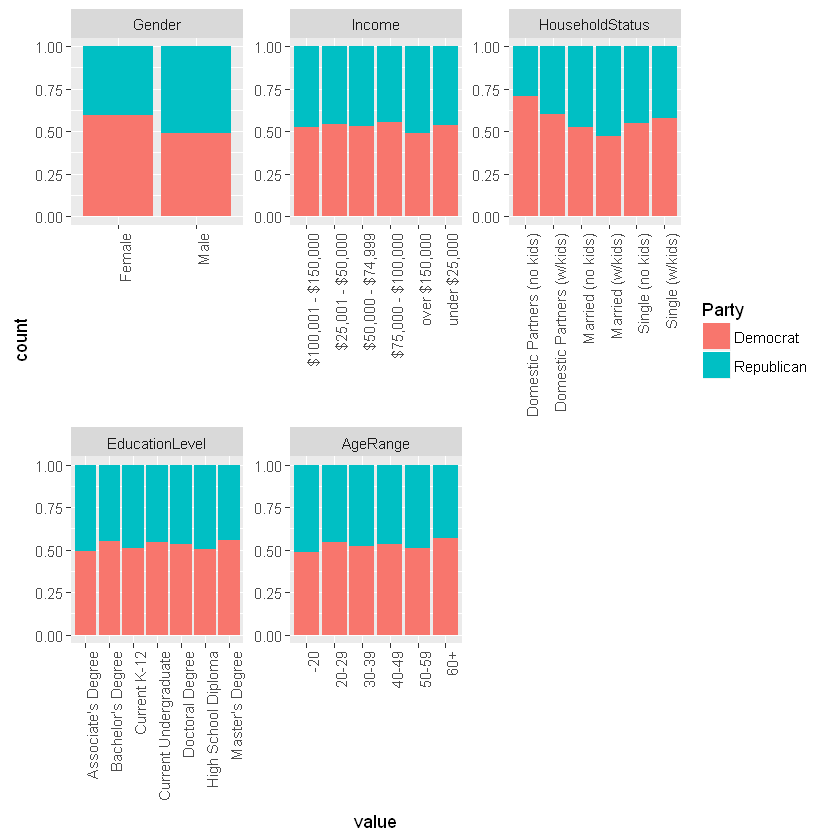

In [13]:
# Percentages
ggplot(melted01, aes(x = value, y = ..count.., fill = Party)) +
    geom_bar(position = "fill") + facet_wrap(~ variable, scales = "free") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

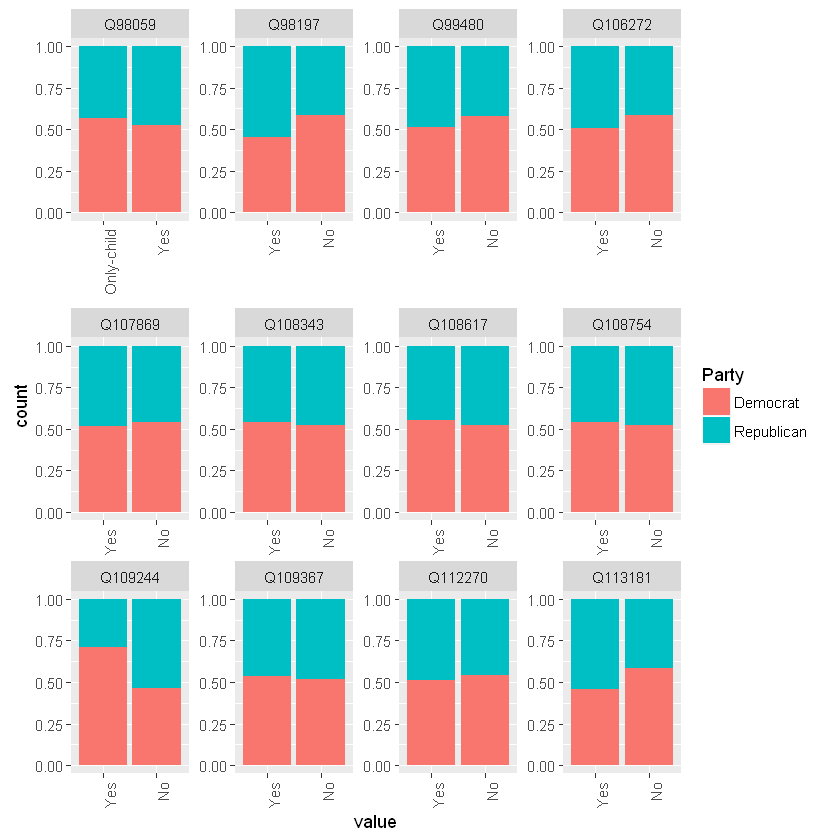

In [14]:
# Percentages
ggplot(melted02, aes(x = value, y = ..count.., fill = Party)) +
    geom_bar(position = "fill") + facet_wrap(~ variable, scales = "free") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

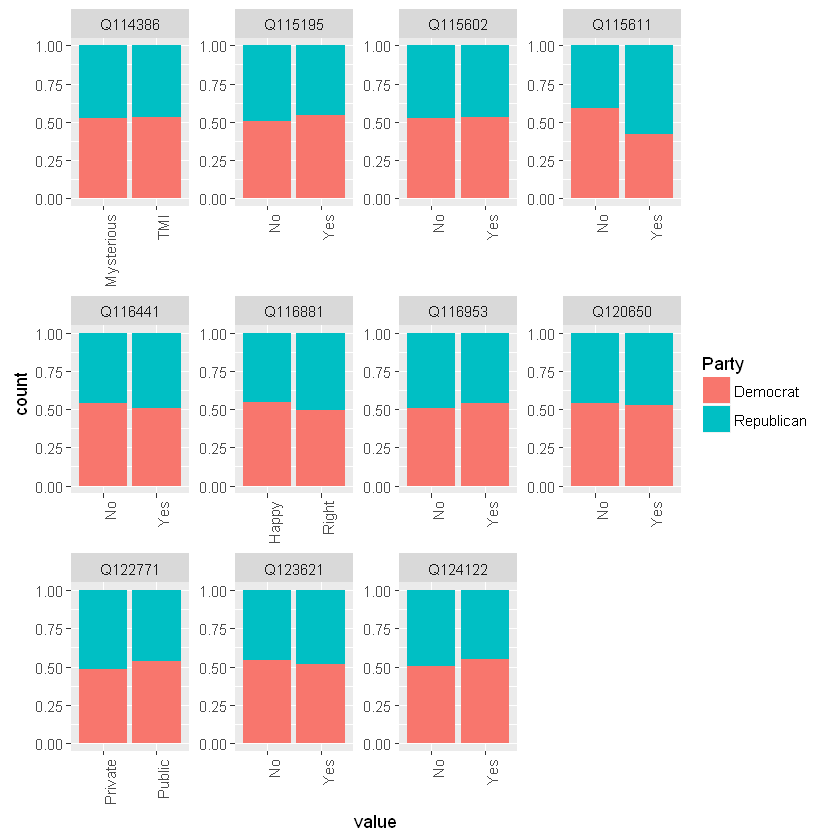

In [15]:
# Percentages
ggplot(melted03, aes(x = value, y = ..count.., fill = Party)) +
    geom_bar(position = "fill") + facet_wrap(~ variable, scales = "free") +
    theme(axis.text.x = element_text(angle = 90, hjust = 1))

Random Forest Model

In [16]:
# Full training set randomForest
ModelForestFull = randomForest(Party ~ . - USER_ID, 
                               data = Train, 
                               ntree = 1500, 
                               nodesize = 200)

pred.rforest.full = predict(ModelForestFull)

# Accuracy
train_table = table(Train$Party, pred.rforest.full)
train_table
(train_table[1,1] + train_table[2,2]) / nrow(Train)

            pred.rforest.full
             Democrat Republican
  Democrat       1983        968
  Republican     1154       1463

[1] 0.6188937

Predict & create submission file (RF)

In [17]:
# Predict Testing Data
pred.rforest.Test = predict(ModelForestFull, newdata = Test)

# Submission
MySubmissionForest = data.frame(USER_ID = Test$USER_ID, Predictions = pred.rforest.Test)
write.csv(MySubmissionForest, "Submissions/SubForest8.csv", row.names=FALSE)

CART with CV

In [18]:
# Cross Validation Train
numFolds = trainControl(method = "cv", number = 10)
cpGrid = expand.grid(.cp = seq(0.001,0.1,0.001))

train(Party ~ . - USER_ID, 
      data = Train, 
      method = "rpart", 
      trControl = numFolds, 
      tuneGrid = cpGrid)

CART 

5568 samples
  29 predictor
   2 classes: 'Democrat', 'Republican' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 5011, 5012, 5012, 5011, 5011, 5011, ... 
Resampling results across tuning parameters:

  cp     Accuracy   Kappa    
  0.001  0.6068704  0.2096145
  0.002  0.6203338  0.2374933
  0.003  0.6154877  0.2277225
  0.004  0.6163870  0.2285991
  0.005  0.6172847  0.2306843
  0.006  0.6180028  0.2319391
  0.007  0.6180028  0.2321079
  0.008  0.6190797  0.2346960
  0.009  0.6190797  0.2346960
  0.010  0.6190797  0.2346960
  0.011  0.6190797  0.2346960
  0.012  0.6190797  0.2346960
  0.013  0.6190797  0.2346960
  0.014  0.6190797  0.2346960
  0.015  0.6190797  0.2346960
  0.016  0.6190797  0.2346960
  0.017  0.6190797  0.2346960
  0.018  0.6190797  0.2346960
  0.019  0.6190797  0.2346960
  0.020  0.6190797  0.2346960
  0.021  0.6190797  0.2346960
  0.022  0.6190797  0.2346960
  0.023  0.6190797  0.2346960
  0.024  0.6190797  0.2346960
  0.0

Create and plot tree

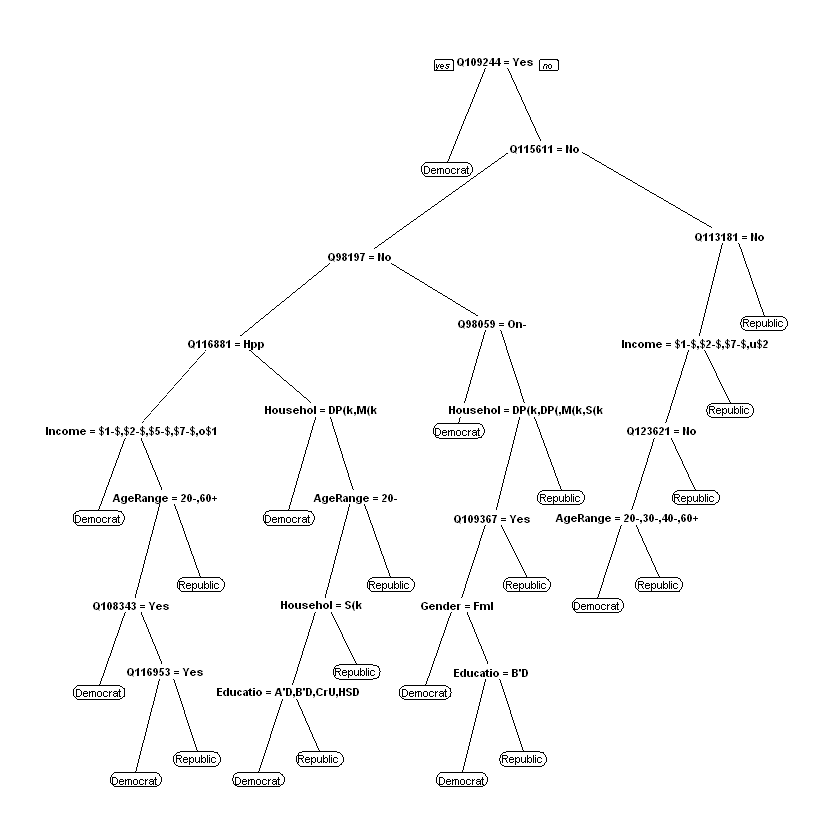

In [19]:
tree = rpart(Party ~ . -USER_ID, data = Train, method = "class", cp = 0.002)
prp(tree)

Predict & create submission file (CART)

In [20]:
pred.tree = predict(tree, newdata = Test)
threshold = 0.5
PredTestLabels = as.factor(ifelse(pred.tree[,1] > threshold, "Democrat", "Republican"))


# Submission
MySubmission = data.frame(USER_ID = Test$USER_ID, Predictions = PredTestLabels)
write.csv(MySubmission, "Submissions/SubCART11.csv", row.names=FALSE)

Warning message:
: contrasts dropped from factor GenderWarning message:
: contrasts dropped from factor IncomeWarning message:
: contrasts dropped from factor HouseholdStatusWarning message:
: contrasts dropped from factor EducationLevelWarning message:
: contrasts dropped from factor Q98059Warning message:
: contrasts dropped from factor Q98197Warning message:
: contrasts dropped from factor Q99480Warning message:
: contrasts dropped from factor Q106272Warning message:
: contrasts dropped from factor Q107869Warning message:
: contrasts dropped from factor Q108343Warning message:
: contrasts dropped from factor Q108617Warning message:
: contrasts dropped from factor Q108754Warning message:
: contrasts dropped from factor Q109244Warning message:
: contrasts dropped from factor Q109367Warning message:
: contrasts dropped from factor Q112270Warning message:
: contrasts dropped from factor Q113181Warning message:
: contrasts dropped from factor Q114386Warning message:
: contrasts dropped f

Logistic Regression with holdout data

In [21]:
# GLM
ModelGLM = glm(Party ~ . -USER_ID, data = Train_model, family = binomial)

pred.glm = predict(ModelGLM, type = "response")



ModelGLMFull = glm(Party ~ . -USER_ID, data = Train, family = binomial)
pred.glm.full = predict(ModelGLM, newdata = Test, type = "response")

PredTestLabelsGLM = as.factor(ifelse(pred.glm.full <= threshold, "Democrat", "Republican"))

# Submission
MySubmission3 = data.frame(USER_ID = Test$USER_ID, Predictions = PredTestLabelsGLM)
write.csv(MySubmission3, "Submissions/SubGLM3.csv", row.names=FALSE)

Warning message:
: contrasts dropped from factor GenderWarning message:
: contrasts dropped from factor IncomeWarning message:
: contrasts dropped from factor HouseholdStatusWarning message:
: contrasts dropped from factor EducationLevelWarning message:
: contrasts dropped from factor Q98059Warning message:
: contrasts dropped from factor Q98197Warning message:
: contrasts dropped from factor Q99480Warning message:
: contrasts dropped from factor Q106272Warning message:
: contrasts dropped from factor Q107869Warning message:
: contrasts dropped from factor Q108343Warning message:
: contrasts dropped from factor Q108617Warning message:
: contrasts dropped from factor Q108754Warning message:
: contrasts dropped from factor Q109244Warning message:
: contrasts dropped from factor Q109367Warning message:
: contrasts dropped from factor Q112270Warning message:
: contrasts dropped from factor Q113181Warning message:
: contrasts dropped from factor Q114386Warning message:
: contrasts dropped f

Accuracy Training set & Holdout data

In [22]:
# Accuracy
train_glm_table = table(Train_model$Party, pred.glm > threshold)
train_glm_table
(train_glm_table[1,1] + train_glm_table[2,2]) / nrow(Train_model)

pred.glm.ho = predict(ModelGLM, newdata = Train_holdout, type = "response")
train_glm_ho_table = table(Train_holdout$Party, pred.glm.ho > threshold)
train_glm_ho_table
(train_glm_ho_table[1,1] + train_glm_ho_table[2,2]) / nrow(Train_holdout)

            
             FALSE TRUE
  Democrat    1354  712
  Republican   756 1076

[1] 0.6233966

Warning message:
: contrasts dropped from factor GenderWarning message:
: contrasts dropped from factor IncomeWarning message:
: contrasts dropped from factor HouseholdStatusWarning message:
: contrasts dropped from factor EducationLevelWarning message:
: contrasts dropped from factor Q98059Warning message:
: contrasts dropped from factor Q98197Warning message:
: contrasts dropped from factor Q99480Warning message:
: contrasts dropped from factor Q106272Warning message:
: contrasts dropped from factor Q107869Warning message:
: contrasts dropped from factor Q108343Warning message:
: contrasts dropped from factor Q108617Warning message:
: contrasts dropped from factor Q108754Warning message:
: contrasts dropped from factor Q109244Warning message:
: contrasts dropped from factor Q109367Warning message:
: contrasts dropped from factor Q112270Warning message:
: contrasts dropped from factor Q113181Warning message:
: contrasts dropped from factor Q114386Warning message:
: contrasts dropped f

            
             FALSE TRUE
  Democrat     575  310
  Republican   341  444

[1] 0.6101796

Full Model GLM

In [23]:
ModelGLMFull = glm(Party ~ . -USER_ID, data = Train, family = binomial)
summary(ModelGLMFull)


Call:
glm(formula = Party ~ . - USER_ID, family = binomial, data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.8103  -1.0878  -0.6909   1.1037   2.0656  

Coefficients:
                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.314829   0.313419  -1.004 0.315138    
Gender2           0.105404   0.064861   1.625 0.104149    
Income2           0.005029   0.108197   0.046 0.962929    
Income3           0.038288   0.099533   0.385 0.700477    
Income4          -0.111210   0.099680  -1.116 0.264565    
Income5           0.115621   0.100756   1.148 0.251161    
Income6           0.112092   0.109811   1.021 0.307360    
HouseholdStatus2  0.509399   0.312860   1.628 0.103483    
HouseholdStatus3  0.633375   0.185464   3.415 0.000638 ***
HouseholdStatus4  0.738850   0.176437   4.188 2.82e-05 ***
HouseholdStatus5  0.464355   0.172051   2.699 0.006956 ** 
HouseholdStatus6  0.473429   0.224876   2.105 0.035266 *  
EducationLevel2  -0.194704   

New model with significant variables

In [27]:
ModelGLMLimited = glm(Party ~ HouseholdStatus + 
                      Q98197 + 
                      Q109244 + 
                      Q115611 + 
                      Q116881 + 
                      Q122771 + 
                      Q124122 + 
                      AgeRange, 
                      data = Train, 
                      family = binomial)
summary(ModelGLMLimited)


Call:
glm(formula = Party ~ HouseholdStatus + Q98197 + Q109244 + Q115611 + 
    Q116881 + Q122771 + Q124122 + AgeRange, family = binomial, 
    data = Train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.7225  -1.0983  -0.7193   1.1058   2.0282  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)      -0.26119    0.20547  -1.271 0.203664    
HouseholdStatus2  0.52919    0.30962   1.709 0.087422 .  
HouseholdStatus3  0.62942    0.18365   3.427 0.000610 ***
HouseholdStatus4  0.74851    0.17438   4.293 1.77e-05 ***
HouseholdStatus5  0.47656    0.16991   2.805 0.005036 ** 
HouseholdStatus6  0.53166    0.21884   2.429 0.015120 *  
Q981972           0.35530    0.05888   6.034 1.60e-09 ***
Q1092442         -0.86907    0.06678 -13.015  < 2e-16 ***
Q1156112          0.50493    0.06184   8.165 3.21e-16 ***
Q1168812          0.15059    0.06172   2.440 0.014692 *  
Q1227712         -0.18249    0.07420  -2.459 0.013918 *  
Q1241222        

Predict & create submission file (GLM)

In [28]:
pred.glm.full = predict(ModelGLMLimited, newdata = Test, type = "response")

PredTestLabelsGLM = as.factor(ifelse(pred.glm.full <= threshold, "Democrat", "Republican"))

# Submission
MySubmission3 = data.frame(USER_ID = Test$USER_ID, Predictions = PredTestLabelsGLM)
write.csv(MySubmission3, "Submissions/SubGLM2.csv", row.names=FALSE)

Warning message:
: contrasts dropped from factor HouseholdStatusWarning message:
: contrasts dropped from factor Q98197Warning message:
: contrasts dropped from factor Q109244Warning message:
: contrasts dropped from factor Q115611Warning message:
: contrasts dropped from factor Q116881Warning message:
: contrasts dropped from factor Q122771Warning message:
: contrasts dropped from factor Q124122